# VISUALIZATIONS WITH PYTHON

## CONTENTS:
1. Import libraries
2. Bar chart
3. Scatter plot
4. Historgram

### 1. Import libraries

In [1]:
# Import libraries, the last three for data visualizations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# define path
path = r'C:\Users\susan\Documents\data analytics\Instacart Basket Analysis\02 Data\Prepared data'

In [15]:
# import ords_prods_merge, the name is reset to ords_prods_merge in this case as well, so therefore that name is used subsequently.
ords_prods_merge = pd.read_pickle(os.path.join(path, 'ords_prods_newest.pkl'))

### 2. Bar chart

<Axes: xlabel='orders_day_of_week'>

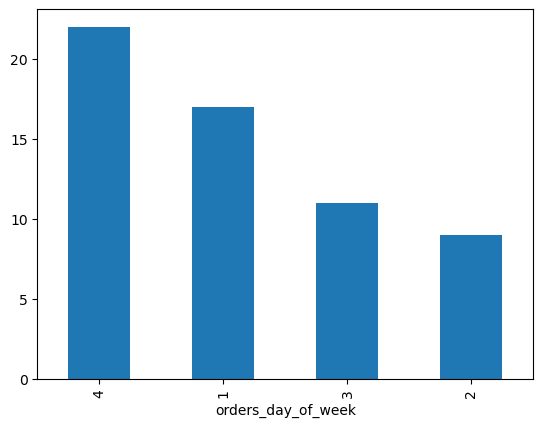

In [17]:
# Create a bar chart (on the frequency, which is why value counts is used)
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

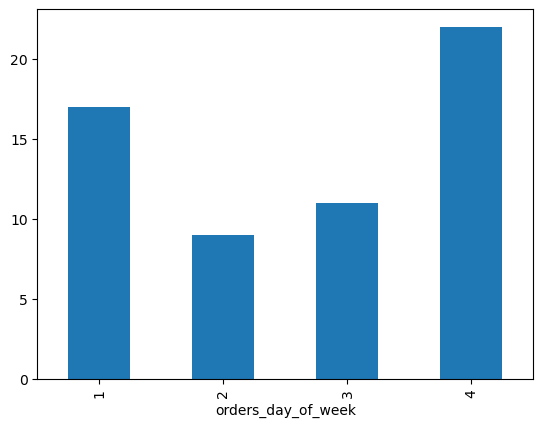

In [19]:
# Create a bar chart with sort index (on the frequency, which is why value counts is used)
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

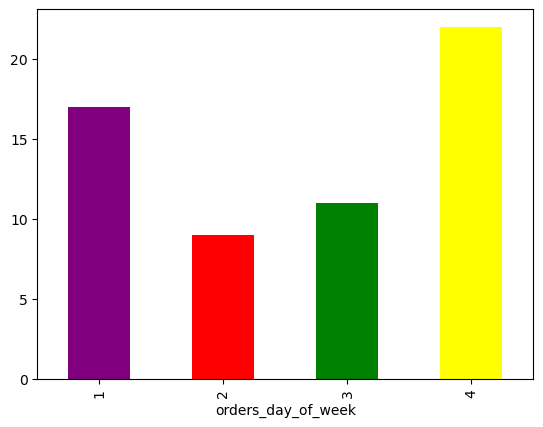

In [24]:
# Add color to the plot bar above
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'green', 'yellow'])

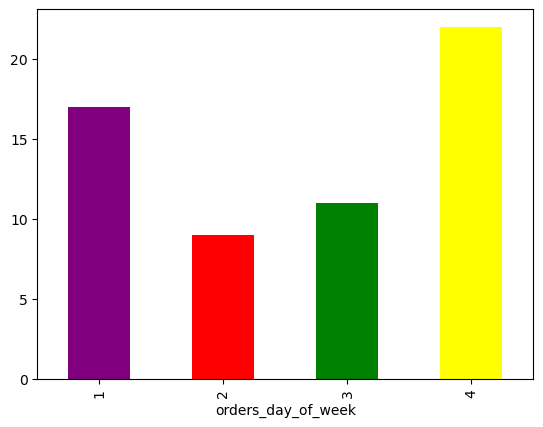

In [26]:
# Add the bar command to save it as a file
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'green', 'yellow'])

In [58]:
# define path
path = r'C:\Users\susan\Documents\data analytics\Instacart Basket Analysis\04 Analysis\Vizualizations'

In [60]:
bar.figure.savefig(os.path.join(path, 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

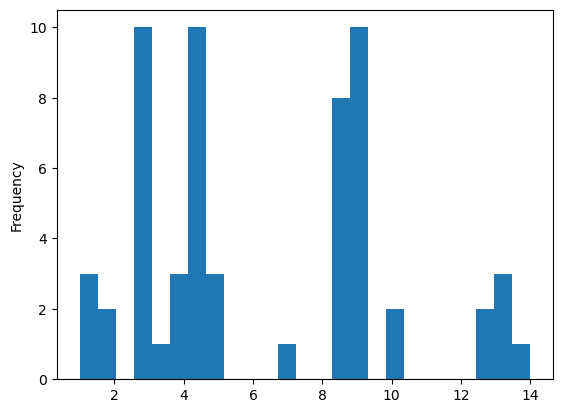

In [62]:
# Creation of a histogram for the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [75]:
# Used the describe function to check the results. Check the peaks for example. 
ords_prods_merge['prices'].describe()

count    59.000000
mean      6.367797
std       3.564405
min       1.000000
25%       3.100000
50%       4.700000
75%       9.000000
max      14.000000
Name: prices, dtype: float64

In [83]:
# Check the data quality - average
ords_prods_merge['prices'].mean()

6.367796610169491

In [85]:
# Check the data quality - min value
ords_prods_merge['prices'].min()

1.0

In [87]:
# Check the data quality - max value
ords_prods_merge['prices'].max()

14.0

### 3. Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

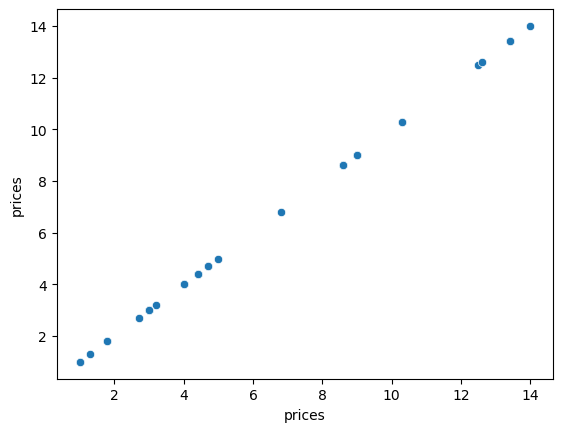

In [91]:
# Create a scatterplot. Use it do identify outliers for example...
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [99]:
# Run a check on the maximum value someone would be considering to pay. I ran it on 13 since I do not have values higher than 100 as mentioned in the exercise.
ords_prods_merge.loc[ords_prods_merge['prices'] > 13]

,order_id,user_id,validation,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,avg_price,frequency_flag
26,431534,1,prior,5,4,15,28.0,17122,6,0,...,14.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,High spender,5.813559,Non frequent customer
42,3108588,1,prior,8,1,14,14.0,46149,5,0,...,13.4,Mid-range product,Regularly busy,Few orders,10,New customer,6.367797,High spender,5.813559,NaN
45,2295261,1,prior,9,1,16,0.0,46149,2,1,...,13.4,Mid-range product,Regularly busy,Few orders,10,New customer,6.367797,High spender,5.813559,Frequent customer
51,2550362,1,prior,10,4,8,30.0,46149,2,1,...,13.4,Mid-range product,Least busy,Most orders,10,New customer,6.367797,High spender,5.813559,Non frequent customer


In [107]:
# Assign nan values to the ones above 13.
ords_prods_merge.loc[ords_prods_merge['prices'] >13, 'prices'] = np.nan

In [111]:
# Running the max function again to check the max value. It is no longer 14 but 12.6. 
ords_prods_merge['prices'].max()

12.6

### 4. Histogram

<Axes: ylabel='Frequency'>

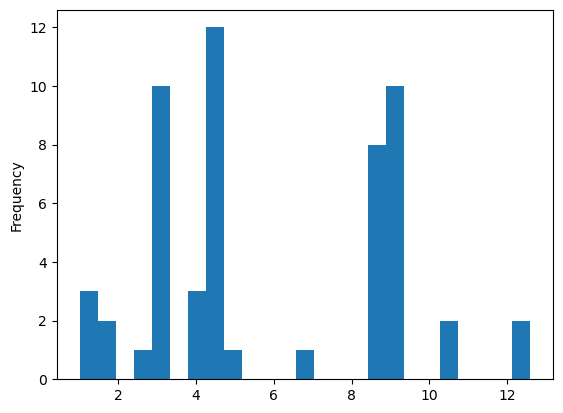

In [119]:
# Creation of a histogram for the prices column again. Now without the max values that were excluded (4 rows marked as nan).
ords_prods_merge['prices'].plot.hist(bins = 25)

Text(0, 0.5, 'Frequency')

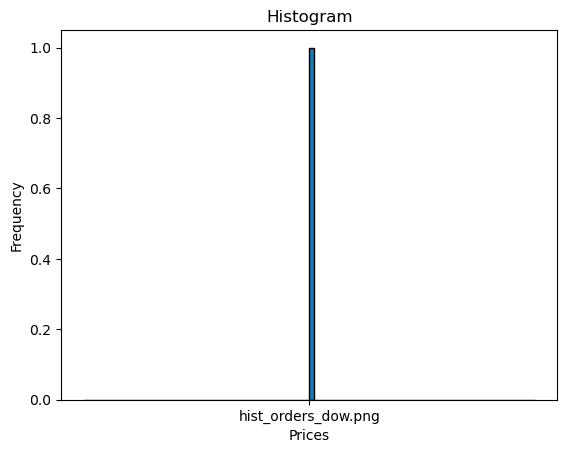

In [183]:
# Create the histogram and save it
plt.hist('hist_orders_dow.png', bins=100
         , edgecolor='black')
plt.title('Histogram')
plt.xlabel('Prices')
plt.ylabel('Frequency')

In [185]:
# Export the histogram
plt.savefig(os.path.join(path, 'hist_orders_dow.png'))

<Figure size 640x480 with 0 Axes>